**Importation de la bibliothèque nécessaire pour gérer les fichiers dans Google Colab depuis l'ordinateur local vers l'environnement Google Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Copie de Base de données - SNI (002).xlsx to Copie de Base de données - SNI (002).xlsx


**Importation des bibliothèque**

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway, chi2_contingency

# Importation des modules de scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


**Chargement et aperçu  de notre Dataset qui est un fichier Excel avec pandas**

In [ ]:
import pandas as pd

# Replace 'filename.xlsx' with the name of your uploaded file
df = pd.read_excel('Copie de Base de données - SNI (002).xlsx')

# Display the first few rows of the dataset
print(df.head())


        numtiers  Annee      NUMTIERS_ANNEE  defaut DATE_DE_CREATION_TIERS  \
0  5200000007513   2015  5200000007513_2015       0             2008-01-02   
1  5200000007513   2016  5200000007513_2016       0             2008-01-02   
2  5200000007934   2015  5200000007934_2015       0             1988-05-31   
3  5200000007934   2017  5200000007934_2017       0             1988-05-31   
4  5200000008051   2015  5200000008051_2015       0             1998-10-02   

  DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
0              1982-01-05       236073240.2                  8258201.71   
1              1982-01-05       258386615.0                  4107268.85   
2              1953-08-05       202426475.2                  5028464.60   
3              1953-08-05       210917616.4                 13076487.89   
4              1995-05-22       171987524.1                 16142629.85   

   RESULTAT_EXPlOITATION  RESULTAT_NET  ...  \
0             7120503.00  -140403

**Exploration de la structure du DataFrame : aperçu des colonnes, types de données, et valeurs manquantes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   numtiers                                 1521 non-null   int64         
 1   Annee                                    1521 non-null   int64         
 2   NUMTIERS_ANNEE                           1521 non-null   object        
 3   defaut                                   1521 non-null   int64         
 4   DATE_DE_CREATION_TIERS                   1521 non-null   datetime64[ns]
 5   DATE_DE_CREATION_ENTREP                  1521 non-null   datetime64[ns]
 6   CHIFFRE_AFFAIRES                         1521 non-null   float64       
 7   EXCEDENT_BRUT_EXPLOITATION               1521 non-null   float64       
 8   RESULTAT_EXPlOITATION                    1521 non-null   float64       
 9   RESULTAT_NET                             

**Visulaisation de notre DataFrame**

In [ ]:
df

,numtiers,Annee,NUMTIERS_ANNEE,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,...,NIVEAU_COMPETITIVITE,QUALITE_INFORMATION_FINANCIERE,REPUTATION,STRUCTUREDUMANAGEMENT,SUPPORT,POSITIONNEMENTMARCHE,Categorie_juridique,Cote en bourse,Appartenance a un groupe,Secteurs
0,5200000007513,2015,5200000007513_2015,0,2008-01-02,1982-01-05,2.360732e+08,8.258202e+06,7.120503e+06,-1.404038e+07,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
1,5200000007513,2016,5200000007513_2016,0,2008-01-02,1982-01-05,2.583866e+08,4.107269e+06,2.031312e+06,2.312467e+06,...,Tres forte concurrence,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
2,5200000007934,2015,5200000007934_2015,0,1988-05-31,1953-08-05,2.024265e+08,5.028465e+06,3.602226e+06,-4.132730e+05,...,Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Leader,SA,0,1,Industries agroalimentaires et du tabac
3,5200000007934,2017,5200000007934_2017,0,1988-05-31,1953-08-05,2.109176e+08,1.307649e+07,1.251423e+07,7.501947e+06,...,Forte presence de produits similaires et compe...,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,1,Industries agroalimentaires et du tabac
4,5200000008051,2015,5200000008051_2015,0,1998-10-02,1995-05-22,1.719875e+08,1.614263e+07,1.254485e+07,1.401029e+06,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur non significatif,SA,0,1,"Commerce, reparations automobiles et d'article..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,5200008692041,2019,5200008692041_2019,0,2016-02-25,2012-11-28,2.126070e+08,3.447732e+06,3.064909e+06,5.818412e+05,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers coherents mais ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Autres sections
1517,5200008791992,2016,5200008791992_2016,0,2015-09-14,2015-08-25,1.899246e+08,1.155362e+06,1.154164e+06,4.472306e+05,...,Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Lettre de confort de la maison mere,Leader,SARL,0,0,"Commerce, reparations automobiles et d'article..."
1518,5200007684315,2018,5200007684315_2018,1,2013-01-09,2013-02-28,2.878672e+09,1.283697e+09,9.366426e+08,5.850665e+08,...,Très forte concurrence,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,1,Industries manufacturières diverses
1519,5200007955060,2019,5200007955060_2019,1,2013-10-09,2006-08-31,4.843269e+08,3.825166e+07,1.351372e+07,-5.124705e+06,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Très bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SARL,0,0,"Industries metallurgiques, mecaniques, electri..."


**DATA PRE PROCESSING**

In [ ]:
df.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP', 'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs'],
      dtype='object')

In [ ]:
df.drop(columns=['NUMTIERS_ANNEE'], inplace=True)

In [ ]:
df['defaut'].value_counts()

,count
defaut,
0,1468
1,53


**Visualisation de la répartition des défauts à l'aide d'un diagramme circulaire**

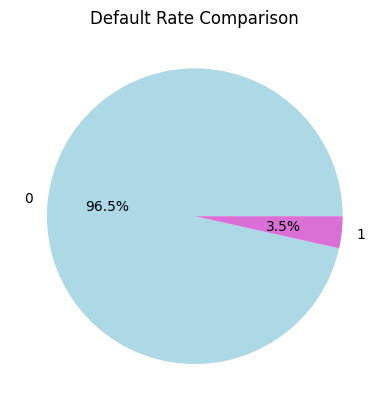

In [ ]:
default_counts = df['defaut'].value_counts()
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', colors=['lightblue','orchid'])
plt.title('Default Rate Comparison')
plt.show()

--> L'analyse montre que 96.5% des individus n'ont pas fait défaut, tandis que 3.5% ont fait défaut. Cette distribution indique un déséquilibre important dans les données, ce qui peut biaiser les résultats des modèles prédictifs.
--> il est nécessaire d'équilibrer les données. Cela peut être fait à l'aide de techniques de sampling

Visualisation de STRUCTUREDUMANAGEMENT

In [ ]:
CA_par_annee = df.groupby(["Annee", "numtiers"])["CHIFFRE_AFFAIRES"].mean().groupby("Annee").mean()
 pd.DataFrame(CA_par_annee)
 df_defaut_par_annee = pd.DataFrame(CA_par_annee)
 df_defaut_par_annee.columns = ['CA_avg']
 # Add titles and labels
 plt.title('Average CA by Year', fontsize=16)
 plt.xlabel('Year', fontsize=14)
 plt.ylabel('Average CA', fontsize=14)
 # Customizing ticks and grid
 plt.xticks(df_defaut_par_annee.index, rotation=45, fontsize=12)
 plt.yticks(fontsize=12)
 plt.grid(axis='y', linestyle='--', alpha=0.7)
 # Show the plot
 plt.tight_layout()
 plt.show()
 # Create a line plot
 plt.figure(figsize=(10, 6))
 plt.plot(df_defaut_par_annee.index, df_defaut_par_annee['CA_avg'], marker='o', color='g', linestyle='-', linewidth=2)
CHI

IndentationError: unexpected indent (<ipython-input-10-045d2ffc746c>, line 2)

In [ ]:
number_of_rows = df.shape[0]
number_of_features = df.shape[1]
print(f'The dataset contains {number_of_rows} rows')
print(f'The dataset contains {number_of_features} columns')

The dataset contains 1521 rows
The dataset contains 39 columns


In [ ]:
df.shape

**Résumé statistique des variables numériques du DataFrame, avec transposition pour une meilleure lisibilité**

In [ ]:
df.describe().transpose()

**DATA CLEANING(Valeur manquantes,valeur abberantes...)**

In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values")

**LES VALEURS MANQUANTES**

METHODE GRAPHIQUE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')
plt.show()

Visualisation des valeurs manquantes dans le DataFrame à l'aide d'une carte de chaleur, Ce code génère une carte de chaleur (heatmap) pour afficher la présence de valeurs manquantes dans le DataFrame df.

---> la carte de chaleur montre une matrice sans "zones" de chaleur, indiquant qu'il n'y a aucune valeur manquante pour toutes les variables du DataFrame.

**TABLEAU POUR LES VALEURS MANQUANTES**

METHODE PAR CALCUL

In [ ]:
# create a table with data missing
missing_values = df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

**Séparation des colonnes catégorielles et continues dans le DataFrame**

In [ ]:
categorical, contin=[],[]

for i in df.columns:

    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        contin.append(i)

print(categorical)
print(contin)

**Affichage des valeurs uniques pour chaque colonne catégorielle**

In [ ]:
for column in categorical:
    unique_values = df[column].unique()
    print(f"Valeurs uniques pour {column} : {unique_values}\n")

**SAMPLING pour equilibrer DataSet**

In [ ]:
class CFG:
    seed = 42  # Random seed
    neg_sample = 0.15 # Downsample negative calss
    pos_sample = 1.5  # Upsample positive class
    class_names = ['defaut']

In [ ]:
# Sampling
positive_df = df.query("defaut==0").sample(frac=CFG.neg_sample, random_state=CFG.seed)
negative_df = df.query("defaut==1").sample(frac=CFG.pos_sample, replace=True, random_state=CFG.seed)
df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0)

print("\nCalss Distribution After Sampling (%):")
display(df.defaut.value_counts(normalize=True)*100)

In [ ]:
default_counts = df['defaut'].value_counts()
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', colors=['lightblue','orchid'])
plt.title('Default Rate Comparison')
plt.show()

---> Cela montre une amélioration de l'équilibre entre les deux classes, comparé à la distribution initiale très déséquilibrée (96.5% pour ceux qui n'ont pas fait défaut et 3.5% pour ceux qui ont fait défaut).

**CALCUL DES RATIOS**

**1-Croissance du Chiffre d'Affaires (%) :**
Ce ratio mesure la variation en pourcentage du chiffre d'affaires d'une période à l'autre, reflétant ainsi l'évolution des revenus de l'entreprise sur une période donnée.

**2-Marge Brute (%) :**
Cet indicateur montre la proportion du chiffre d'affaires qui reste après le coût des biens et services vendus, illustrant ainsi la rentabilité brute de l'entreprise.

**3-Rentabilité d'Exploitation (%) :**
Ce ratio mesure la rentabilité des activités opérationnelles de l'entreprise en fonction de son chiffre d'affaires, après déduction des charges d'exploitation, mais avant amortissements, provisions et impôts.

**4-Taux EBE (%) :**
Cet indicateur évalue la rentabilité opérationnelle de l'entreprise, exprimant le pourcentage du chiffre d'affaires qui reste après les charges d'exploitation, avant la prise en compte des amortissements, des provisions et des impôts.

**5-Rentabilité Nette (%) :**
Ce ratio indique la rentabilité globale de l'entreprise après la prise en compte de toutes les charges, impôts et autres coûts, exprimée par rapport au chiffre d'affaires.

In [ ]:
df["Margebrute%"] = (df["EXCEDENT_BRUT_EXPLOITATION"] / df["CHIFFRE_AFFAIRES"]) * 100

df["CroissanceCA%"] = df["CHIFFRE_AFFAIRES"].pct_change() * 100  # Besoin des données annuelles

df["TauxEBE%"] = (df["EXCEDENT_BRUT_EXPLOITATION"] / df["CHIFFRE_AFFAIRES"]) * 100

df["Rentabilitéexploitation%"] = (df["RESULTAT_EXPlOITATION"] / df["CHIFFRE_AFFAIRES"]) * 100

df["Rentabiliténette%"] = (df["RESULTAT_NET"] / df["CHIFFRE_AFFAIRES"]) * 100

**Vérification des valeurs manquantes pour les ratios financiers**

In [ ]:
# Liste des colonnes à vérifier
columns_to_check = ['Margebrute%', 'CroissanceCA%', 'TauxEBE%','Rentabilitéexploitation%','Rentabiliténette%']  # Remplacez avec vos colonnes

# Parcourir chaque colonne et afficher le nombre de valeurs manquantes
for column in columns_to_check:
    missing_count = df[column].isna().sum()
    print(f"Nombre total de valeurs manquantes dans '{column}' : {missing_count}")


----> La colonne 'CroissanceCA%' présente une valeur manquante, tandis que toutes les autres colonnes ne contiennent aucune valeur manquante.

**Remplissage des valeurs manquantes dans la colonne 'CroissanceCA%' par 0**

In [ ]:
df[['CroissanceCA%']] = df[['CroissanceCA%']].fillna(0)


In [ ]:
columns_of_interest = [
    'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK', 'Margebrute%', 'CroissanceCA%', 'TauxEBE%',
       'Rentabilitéexploitation%', 'Rentabiliténette%'
]

df_selected = df[columns_of_interest]

**Traitement des valeurs extrêmes**

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.boxplot(data=df_selected, orient='h', palette='Set2')
plt.title('Box Plot for Selected Financial Metrics')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.show()

**Suppression des valeurs extrêmes et visualisation avec un boxplot pour les indicateurs financiers sélectionnés**

In [ ]:
# Assuming df is your dataframe and columns_of_interest are defined
columns_of_interest = [
    'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK', 'Margebrute%', 'CroissanceCA%', 'TauxEBE%',
       'Rentabilitéexploitation%', 'Rentabiliténette%'
]

# Filter the data
df_selected = df[columns_of_interest]

# Function to remove outliers based on IQR
def remove_outliers(df):
    df_no_outliers = df.copy()

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows where values are within the bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers

# Remove outliers
df_no_outliers = remove_outliers(df_selected)

# Create the box plot for data without outliers
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.boxplot(data=df_no_outliers, orient='h', palette='Set2')
plt.title('Box Plot for Selected Financial Metrics (Without Outliers)')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.show()

**Remplacer les valeurs abberantes avec les valeurs limites**

In [ ]:
# Assuming df is your original dataframe and columns_of_interest are defined
columns_of_interest = [
    'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK', 'Margebrute%', 'CroissanceCA%', 'TauxEBE%',
       'Rentabilitéexploitation%', 'Rentabiliténette%'
]

# Function to replace outliers with the nearest valid value in the original dataframe
def replace_outliers_with_nearest_value_in_place(df):
    for column in df.columns:
        if column in columns_of_interest:  # Only apply to selected columns
            # Calculate Q1, Q3, and IQR for each column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with the nearest bound using .loc[]
            df.loc[df[column] < lower_bound, column] = lower_bound  # Replace values below the lower bound
            df.loc[df[column] > upper_bound, column] = upper_bound  # Replace values above the upper bound

# Replace outliers in the original dataframe (df)
replace_outliers_with_nearest_value_in_place(df)


# Create the box plot for the modified dataframe (outliers replaced in place)
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.boxplot(data=df[columns_of_interest], orient='h', palette='Set2')
plt.title('Box Plot for Selected Financial Metrics (Outliers Replaced in Place)')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.show()


----->D'après les boxplot généré, nous pouvons constater qu'il n'y a aucune valeur aberrante (outliers) présente dans les données après avoir supprimé les valeurs extrêmes.

In [ ]:
df.head()

In [ ]:
df.describe().transpose()

**Conversion des Dates de Création en Âge**

Pour convertir les dates de création en âge, on calcule la différence entre l'année actuelle et la date de création. Cette transformation permet d'obtenir des informations utiles sur l'âge des entreprises et des tiers dans le jeu de données.

In [ ]:
# Ensure 'date de creation de tier' is a datetime type
df['DATE_DE_CREATION_TIERS'] = pd.to_datetime(df['DATE_DE_CREATION_TIERS'], errors='coerce')

# Create a reference date using 'annee' as the year
df['reference_date'] = pd.to_datetime(df['Annee'].astype(str) + '-12-31')  # Using Dec 31 of the 'annee'

# Calculate the age in years by comparing the reference date with 'date de creation de tier'
df['age_tier'] = (df['reference_date'] - df['DATE_DE_CREATION_TIERS']).dt.days // 365

# Drop the intermediate 'reference_date' column if not needed
df.drop(columns=['reference_date'], inplace=True)
df.drop(columns=['DATE_DE_CREATION_TIERS'], inplace=True)

In [ ]:
# Ensure 'date de creation de l'entreprise' is a datetime type
df['DATE_DE_CREATION_ENTREP'] = pd.to_datetime(df['DATE_DE_CREATION_ENTREP'], errors='coerce')

# Create a reference date using 'annee' as the year
df['reference_date'] = pd.to_datetime(df['Annee'].astype(str) + '-12-31')  # Using Dec 31 of the 'annee'

# Calculate the age in years by comparing the reference date with 'date de creation de tier'
df['age_ent'] = (df['reference_date'] - df['DATE_DE_CREATION_ENTREP']).dt.days // 365

# Drop the intermediate 'reference_date' column if not needed
df.drop(columns=['reference_date'], inplace=True)


In [ ]:
df.head()

In [ ]:
df.drop(columns=['DATE_DE_CREATION_ENTREP'], inplace=True)

**LABEL ENCODING**

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary to store mappings of categorical values to their encoded labels
mappings = {}

# Apply label encoding to each categorical column and store the mappings
for col in categorical_columns:
    # Convert the column to 'category' type
    df[col] = df[col].astype('category')

    # Store the mapping of original categories to their encoded values
    mappings[col] = {category: code for code, category in enumerate(df[col].cat.categories)}

    # Replace the original categories with their corresponding codes
    df[col] = df[col].cat.codes

# Display the mappings for each categorical column
for col, mapping in mappings.items():
    print(f"Column: {col}")
    for category, code in mapping.items():
        print(f"  {category} -> {code}")
    print()

Ce code effectue l'encodage des variables catégorielles dans le DataFrame df en remplaçant chaque catégorie par un code numérique. Cela permet de transformer les variables qualitatives en variables quantitatives, ce qui est souvent nécessaire pour les modèles de machine learning.

#on a les memes valeurs pour ces variables qu'on va les traiter

Par exemple pour la variable DIVERSITE_FOURNISSEURS,  Tres grande diversite -> 4
  Très grande diversite -> 5 representent la meme chose

In [ ]:
df['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'] = df['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'].replace({2: 0, 0: 2})

df['DIVERSITE_CLIENTS'] = df['DIVERSITE_CLIENTS'].replace({6: 0, 0: 2,5: 3,2: 4})

df['DIVERSITE_FOURNISSEURS'] = df['DIVERSITE_FOURNISSEURS'].replace({2: 0, 3: 1, 0: 2, 1: 3})


df['NIVEAU_COMPETITIVITE'] = df['NIVEAU_COMPETITIVITE'].replace({0: 3, 3: 0})

df['QUALITE_INFORMATION_FINANCIERE'] = df['QUALITE_INFORMATION_FINANCIERE'].replace({2: 0, 0: 2})

df['REPUTATION'] = df['REPUTATION'].replace({1: 0, 2: 1,0: 2})

df['STRUCTUREDUMANAGEMENT'] = df['STRUCTUREDUMANAGEMENT'].replace({2: 0, 0: 2})

df['SUPPORT'] = df['SUPPORT'].replace({2: 0, 0: 1,4: 2,1: 4})

df['POSITIONNEMENTMARCHE'] = df['POSITIONNEMENTMARCHE'].replace({2: 0, 0: 2})

df['Categorie_juridique'] = df['Categorie_juridique'].replace({1: 0, 0: 1})

In [ ]:
# Fuse values 2, 3, and 4 into a single category (let's use value 2)
df['DIVERSITE_CLIENTS'] = df['DIVERSITE_CLIENTS'].replace({2: 2, 3: 2, 4: 2})
df['DIVERSITE_CLIENTS'] = df['DIVERSITE_CLIENTS'].replace({5: 3, 6: 4})
# Check the unique values in DIVERSITE_CLIENTS after fusion
print(df['DIVERSITE_CLIENTS'].value_counts())

In [ ]:
# Fuse values 2, 3, and 4 into a single category (let's use value 2)
df['DIVERSITE_FOURNISSEURS'] = df['DIVERSITE_FOURNISSEURS'].replace({4: 4, 5: 4})

# Check the unique values in DIVERSITE_CLIENTS after fusion
print(df['DIVERSITE_FOURNISSEURS'].value_counts())

In [ ]:
# Fuse values 2, 3, and 4 into a single category (let's use value 2)
df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'] = df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace({1: 1, 2: 1})
df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'] = df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace({3: 2, 4: 3, 5: 4})
# Check the unique values in DIVERSITE_CLIENTS after fusion
print(df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].value_counts())

In [ ]:
# Fuse values 2, 3, and 4 into a single category (let's use value 2)
df['NIVEAU_COMPETITIVITE'] = df['NIVEAU_COMPETITIVITE'].replace({3: 3, 4: 3})

# Check the unique values in DIVERSITE_CLIENTS after fusion
print(df['NIVEAU_COMPETITIVITE'].value_counts())

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.drop(columns=['numtiers'], inplace=True)

In [ ]:
print(categorical)
print(contin)
target='defaut'

**Importation des bibliothèques pour les tests de corrélation et d'analyse statistique**

In [ ]:
from scipy.stats import pearsonr, f_oneway
from scipy.stats import chi2_contingency

**HEATMAP entre les variables quantitatives et qualitatives en utilisant les tests statistique Pearson Correlation, v-Cramer Correlation, ANOVA F-Statistic**

**1-Relation entre les variables quantitatives avec le coefficient de corrélation de Pearson**:

-Le coefficient de Pearson mesure la relation linéaire entre deux variables quantitatives, allant de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite). Une valeur de 0 indique aucune relation linéaire.

**2-Relation entre les variables qualitatives avec le V de Cramér**:

-Le V de Cramér mesure l'association entre deux variables qualitatives, de 0 (pas d'association) à 1 (association parfaite). C'est une mesure utile pour les variables catégorielles.

**3-Relation entre les variables qualitatives et quantitatives avec l'ANOVA**:

-L'ANOVA teste si les moyennes d'une variable quantitative diffèrent entre plusieurs groupes définis par une variable qualitative. Une p-value inférieure à 0.05 indique une différence significative.



In [ ]:
# Function for V-Cramer correlation
def v_cramer(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Function for calculating correlations
def calculate_correlations(df, num_col, cat_col, target):
    correlations = {}

    # Pearson correlation for quantitative variables
    for col1 in num_col:
        for col2 in num_col:
            if col1 != col2:
                corr, _ = pearsonr(df[col1], df[col2])
                correlations[f"{col1} vs {col2} (Pearson)"] = corr

    # ANOVA for quantitative vs qualitative variables
    for quanti in num_col:
        for quali in cat_col:
            groups = [df[quanti][df[quali] == val] for val in df[quali].unique()]
            f_stat, p_value = f_oneway(*groups)
            correlations[f"{quanti} vs {quali} (ANOVA)"] = f_stat

    # V-Cramer for qualitative vs qualitative variables
    for col1 in cat_col:
        for col2 in cat_col:
            if col1 != col2:
                correlations[f"{col1} vs {col2} (V-Cramer)"] = v_cramer(df[col1], df[col2])

    # Correlation with target (binary variable)
    for col in num_col:
        corr, _ = pearsonr(df[col], df[target])
        correlations[f"{col} vs {target} (Pearson)"] = corr

    for col in cat_col:
        correlations[f"{col} vs {target} (V-Cramer)"] = v_cramer(df[col], df[target])

    return correlations


In [ ]:
def plot_individual_heatmaps(correlations):
    # Convert the correlations dictionary to a DataFrame
    corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable Pair', 'Correlation'])
    corr_df[['Var1', 'Var2']] = corr_df['Variable Pair'].str.extract(r'(.*) vs (.*)')

    # Separate data by correlation type
    quanti_quanti = corr_df[corr_df['Variable Pair'].str.contains('(Pearson)')]
    quali_quali = corr_df[corr_df['Variable Pair'].str.contains('(V-Cramer)')]
    quanti_quali = corr_df[corr_df['Variable Pair'].str.contains('(ANOVA)')]

    # Helper function to plot a heatmap
    def plot_heatmap(data, title):
        if not data.empty:
            heatmap_data = data.pivot_table(index='Var1', columns='Var2', values='Correlation')
            plt.figure(figsize=(30, 28))
            sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
            plt.title(title)
            plt.xlabel('Variable 2')
            plt.ylabel('Variable 1')
            plt.tight_layout()
            plt.show()

    # Plot heatmaps
    plot_heatmap(quanti_quanti, "Quantitative vs Quantitative (Pearson Correlation)")
    plot_heatmap(quali_quali, "Qualitative vs Qualitative (V-Cramer Correlation)")
    plot_heatmap(quanti_quali, "Quantitative vs Qualitative (ANOVA F-Statistic)")


In [ ]:
df.columns

In [ ]:
contin=['CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK', 'Margebrute%', 'CroissanceCA%', 'TauxEBE%',
       'Rentabilitéexploitation%', 'Rentabiliténette%', 'age_tier', 'age_ent']
categorical=['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs']

In [ ]:
import numpy as np
# Calculate correlations
correlation_results = calculate_correlations(df, contin, categorical, target)

# Plot individual heatmaps
plot_individual_heatmaps(correlation_results)

**Analyse des Variables Continues (WOE, IV, Discrétisation)**

**1-Discrétisation des Variables Continues:**
La discrétisation consiste à convertir des variables continues en variables catégoriques en les regroupant dans des intervalles (ou "bins"). Cette méthode simplifie les analyses tout en préservant les tendances significatives des données. Elle est fréquemment utilisée dans les modèles de scoring, tels que ceux pour évaluer les risques de crédit.
Chaque intervalle devient une catégorie distincte, permettant d’examiner leur impact sur la variable cible. Cette transformation améliore également l’interprétabilité et peut faciliter la détection des relations non linéaires.

**2-Weight of Evidence (WOE):**
Le Weight of Evidence (WOE) est une mesure qui exprime la relation entre une catégorie discrétisée et la probabilité d’un événement (par exemple, un défaut de paiement). Il est calculé en prenant le logarithme du ratio entre la proportion de non-événements et d’événements dans chaque catégorie.

-Un WOE positif indique une association plus forte avec les événements (par exemple, défaut).
-Un WOE négatif indique une association avec les non-événements.


**3-Information Value (IV)**
L’Information Value (IV) mesure la capacité d’une variable discrétisée à différencier les classes d’une variable cible (comme défaut ou non-défaut). Elle combine les WOE et la différence des proportions d’événements et de non-événements pour chaque catégorie.

Interprétation de l’IV :
IV < 0.02 : Pouvoir prédictif très faible.
0.02 ≤ IV < 0.1 : Pouvoir prédictif faible.
0.1 ≤ IV < 0.3 : Pouvoir prédictif modéré.
IV ≥ 0.3 : Pouvoir prédictif élevé.

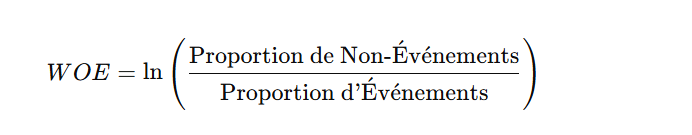

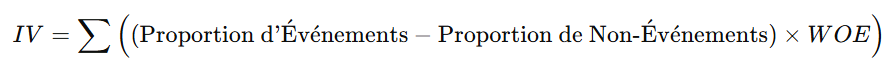

In [ ]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your DataFrame 'data' and the target variable name
data = df  # Replace 'your_data_frame' with your actual DataFrame
target_variable = 'defaut'  # Replace 'default.payment.next.month' with your actual target variable name

# Define continuous and discrete variables manually
continuous_vars = num_col
discrete_vars = cat_col

# Define the function iv_woe
def iv_woe(data, target, bins=10, show_woe=False, continuous_vars=[], discrete_vars=[]):
    # Dictionary to store WOE tables for each variable
    woe_tables = {}
    iv_values = {}  # To store IV values for each variable

    # Run WOE and IV on continuous independent variables
    for ivars in continuous_vars:
        d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        # Calculate the number of events in each group (bin)
        d = d0.groupby(pd.qcut(data[ivars], bins, duplicates='drop'), observed=False).agg({"y": ["count", "sum"]}).reset_index()
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        d['Default Rate'] = d['Events'] / len(data)

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)

        # Add WOE table to the dictionary
        woe_tables[ivars] = d

        # Calculate and store IV sum
        iv_values[ivars] = d['IV'].sum()

        # Show WOE Table
        if show_woe == True:
            print(d)

    # Run WOE and IV on discrete independent variables
    for ivars in discrete_vars:
        d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        # Calculate the number of events in each category
        d = d0.groupby('x', observed=False).agg({"y": ["count", "sum"]}).reset_index()
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each category.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each category.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each category.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)

        # Add WOE table to the dictionary
        woe_tables[ivars] = d

        # Calculate and store IV sum
        iv_values[ivars] = d['IV'].sum()

        # Show WOE Table
        if show_woe == True:
            print(d)

    return woe_tables, iv_values

# Call the iv_woe function with your data and target variable
woe_tables, iv_values = iv_woe(data, target_variable, bins=3, show_woe=True, continuous_vars=continuous_vars, discrete_vars=discrete_vars)

# Display the sum of IV for each variable
print("\nInformation Value (IV) for each variable:")
for var, iv in iv_values.items():
    print(f"{var}: {iv}")


**INTERPRETATION:**

1-La discrétisation des variables continues facilite l’analyse et les rend plus compatibles avec les modèles prédictifs.

2-Le Weight of Evidence (WOE) est une méthode essentielle pour transformer les variables discrétisées en une forme exploitable, capturant efficacement les liens entre chaque catégorie et la cible.

3-L’Information Value (IV) permet d’évaluer quantitativement le pouvoir prédictif des variables, aidant à sélectionner celles qui sont les plus informatives et pertinentes pour la modélisation.


**Conclusion :**

Après l’analyse des variables à l’aide du WOE et de l’IV, les étapes suivantes ont été réalisées :

**1-Variables conservées après vérification du WOE :**
Les variables suivantes montrent une relation significative et cohérente avec la cible, rendant leur inclusion pertinente pour la modélisation :

CHIFFRE_AFFAIRES, RESULTAT_NET, FONDS_DE_ROULEMENT, TRESORIE_NETTE, Rentabilité nette%, age_tier, age_ent, TOTAL_PASSIF, AUTO_FINANCEMENT, FRAIS_FINANCIERS, QUALITE_INFORMATION_FINANCIERE, Categorie_juridique, NIVEAU_COMPETITIVITE, Cote en bourse, Appartenance à un groupe.
Ces variables sont linéaires et monotones avec la cible, facilitant leur utilisation dans des modèles avancés.

**2-Variables conservées après vérification de l’IV :**

-RESULTAT_NET : IV = 0.49386 – Excellente capacité discriminante, indispensable.
-TRESORIE_NETTE : IV = 0.26279 – Pouvoir discriminant modéré mais utile.
-AUTO_FINANCEMENT : IV = 0.10734 – Variable modérément pertinente.
-FRAIS_FINANCIERS : IV = 0.16445 – Modérément informative, à inclure avec précaution.
-Rentabilité nette% : IV = 0.68783 – Forte capacité discriminante, à prioriser.
-age_tier : IV = 0.26559 – Modérément utile pour le modèle.
-NIVEAU_COMPETITIVITE : IV = 0.05490 – Pouvoir discriminant faible mais significatif.

**Synthèse :**

Les variables telles que RESULTAT_NET, Rentabilité nette%, et TRESORIE_NETTE présentent un fort pouvoir discriminant et devraient être privilégiées dans les modèles.

En revanche, des variables avec un IV faible, comme NIVEAU_COMPETITIVITE, peuvent nécessiter des ajustements ou transformations pour améliorer leur pertinence.
En excluant les variables peu significatives, le modèle gagne en simplicité et en efficacité. Ces sélections garantissent un jeu de données optimisé pour des analyses prédictives robustes.








In [ ]:
numerical =['RESULTAT_NET','TRESORIE_NETTE','AUTO_FINANCEMENT',
          'FRAIS_FINANCIERS','Rentabiliténette%','age_tier']
cat= ['NIVEAU_COMPETITIVITE']

**Division des intervalles des valeurs numériques en bins pour faciliter l'analyse et la visualisation des données**

In [ ]:
# Function to apply binning to numerical variables and display intervals
def apply_binning_with_intervals(data, variables, bins=10):
    bin_intervals = {}  # Dictionary to store bin intervals for each variable

    for var in variables:
        # Apply pd.qcut to bin the variable
        try:
            binning_result = pd.qcut(data[var], bins, duplicates='drop', retbins=True)
            binned_data = binning_result[0]  # The binned series
            bin_edges = binning_result[1]  # The bin edges

            # Create bin labels and store intervals
            bin_labels = [f"Bin_{i+1}" for i in range(len(bin_edges) - 1)]
            bin_intervals[var] = {label: f"[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})"
                                  for i, label in enumerate(bin_labels)}

            # Replace original values with bin labels
            data[var] = pd.qcut(data[var], bins, labels=bin_labels, duplicates='drop')

        except ValueError:
            print(f"Warning: Not enough unique values to create {bins} bins for variable '{var}'.")

    return data, bin_intervals

# Apply binning to the continuous variables in 'num_col'
binned_data, bin_intervals = apply_binning_with_intervals(data.copy(), continuous_vars, bins=3)
# Display the bin intervals for each variable
print("\nBin Intervals for Each Numerical Variable:")
for var, intervals in bin_intervals.items():
    print(f"\nVariable: {var}")
    for bin_label, interval in intervals.items():
        print(f"  {bin_label}: {interval}")

In [ ]:
# Function to map bin labels to simple integer values
def encode_bins_as_integers(data, bin_intervals, variables):
    for var in variables:
        if var in bin_intervals:
            # Create a mapping of bin labels to integers
            bin_labels = list(bin_intervals[var].keys())  # Get bin labels
            label_to_int_mapping = {label: idx for idx, label in enumerate(bin_labels)}

            # Replace bin labels with integers
            data[var] = data[var].map(label_to_int_mapping)
        else:
            print(f"Warning: No bin intervals found for variable '{var}'. Skipping encoding.")

    return data

# Apply integer encoding to the binned data
encoded_data = encode_bins_as_integers(binned_data.copy(), bin_intervals, continuous_vars)

# Display the updated DataFrame with integer-encoded values
print("\nData with Integer-Encoded Values for Numerical Variables:")
print(encoded_data[continuous_vars])  # Show only the numerical variables with encoded values


**Conversion de toutes les valeurs du jeu de données en entiers pour uniformiser le type de données**

In [ ]:
# Function to convert all values in the dataset to integers
def convert_all_to_int(data):
    # Convert continuous variables to integers
    data = data.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric

    # For categorical columns, apply integer encoding
    for column in data.select_dtypes(include=['object']).columns:  # Apply to categorical columns
        data[column] = data[column].astype('category').cat.codes

    # Convert all columns to integers
    data = data.astype(int)

    return data

# Convert all values in the dataset to integers
data = convert_all_to_int(encoded_data.copy())

# Display the updated DataFrame with integer values
print("\nData with All Values Converted to Integers:")
print(data)

**LA Nouvelle Data Frame**

Après la discrétisation des variables continues, toutes les variables du nouveau DataFrame sont désormais qualitatives. Afin d’assurer la qualité des analyses, il est essentiel de vérifier les corrélations entre ces variables. Cette vérification permet de détecter d’éventuelles corrélations élevées qui pourraient entraîner des problèmes de multicolinéarité dans les modèles, compromettant ainsi la fiabilité des résultats.

In [ ]:
df1=data[['defaut','RESULTAT_NET','TRESORIE_NETTE','AUTO_FINANCEMENT',
          'FRAIS_FINANCIERS','Rentabiliténette%','age_tier','NIVEAU_COMPETITIVITE']]

In [ ]:
df1.head()

In [ ]:
from scipy.stats import chi2_contingency

# Function to calculate V-Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate V-Cramer's V for all pairs of variables
correlation_matrix = pd.DataFrame(index=df1.columns, columns=df1.columns)
for i in df1.columns:
    for j in df1.columns:
        correlation_matrix.loc[i, j] = cramers_v(df1[i], df1[j])

# Display the correlation matrix
print(correlation_matrix)



In [ ]:
from scipy.stats import chi2_contingency

# Function to calculate V-Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate V-Cramer's V for all pairs of variables
correlation_matrix = pd.DataFrame(index=df1.columns, columns=df1.columns)
for i in df1.columns:
    for j in df1.columns:
        correlation_matrix.loc[i, j] = cramers_v(df1[i], df1[j])

# Display the correlation matrix
print(correlation_matrix)


In [ ]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (V-Cramer\'s V)')
plt.show()

**1-Absence de multicolinéarité majeure :**

La plupart des corrélations entre les variables sont faibles (inférieures à 0.5), ce qui suggère une faible association entre les variables qualitatives et un risque limité de multicolinéarité.

**2-Corrélations significatives :** Quelques corrélations modérées apparaissent, notamment entre :

-RESULTAT_NET et Rentabiliténette% (0.66), indiquant une relation notable entre ces deux variables.
-RESULTAT_NET et AUTO_FINANCEMENT (0.53), ce qui peut refléter une certaine dépendance logique dans les données.

**3-Variables faiblement corrélées :**

 Les autres variables montrent des corrélations très faibles, notamment avec NIVEAU_COMPETITIVITE ou age_tier, ce qui pourrait indiquer une contribution indépendante à l’analyse.

**MODEL: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = df1

# Separate the target variable from the features
X = data.drop(['defaut'], axis=1)
y = data['defaut']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Separate numerical and categorical features
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# Concatenate scaled numerical features with categorical features
X_train_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
X_train_scaled_df = pd.concat([X_train_scaled_df, X_train[categorical_columns]], axis=1)

X_test_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test[categorical_columns]], axis=1)
# Assuming X_train_scaled_df and y_train are already prepared

# 3. Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=400, random_state=40)
rf_classifier.fit(X_train_scaled_df, y_train)

# 4. Evaluate its performance
y_pred_rf = rf_classifier.predict(X_test_scaled_df)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Additional evaluation metrics
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for class 1 (default)
y_proba_rf = rf_classifier.predict_proba(X_test_scaled_df)[:, 1]

# Calculate Gini index
gini_index_rf = 2 * roc_auc_score(y_test, y_proba_rf) - 1

print("Gini Index (Random Forest):", gini_index_rf)

In [ ]:
print(roc_auc_score(y_test, y_proba_rf))